# 1. Imporing Libraries

## 1.1. Imporing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

## 1.2 Importing StatsModel Library for displaying detailed information about model

In [2]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 1.3 Importing scikit Library for evaluating requirement specific parameters and performing preprocessing steps (splitting & Scaling)

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

## 1.4 Other Libraries

In [4]:
import datetime
from scipy.stats import pearsonr

# 2. Data Sourcing

## 2.1 Importing SCV Data from file

In [5]:
bike = pd.read_csv('day.csv')

In [6]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Description of Variables in Dataset
    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [7]:
bike.shape

(730, 16)

In [8]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no null values. Hence, this data does not require much cleaning.

### Dropping columns not required.

In [10]:
#Dropping the redundant variables
# holiday is redundant as the workingday column covers that information.
# dteday is not needed as we have useful variables like yr and month. 
#instant is just an index variable and hence isn't needed.
# casual+registered=cnt and cnt is our target variabl2. Hence,can't consider casual and registered columns as independent variables.

bike.drop(['weekday','dteday','instant', 'casual','registered', 'atemp'],axis=1,inplace=True)

In [11]:
bike.shape

(730, 10)

In [12]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit', 'temp',
       'hum', 'windspeed', 'cnt'],
      dtype='object')

##### Defining set of fucntions which can be useful to plot graph  / charts

In [13]:
def bar_graph_plot_function(data, graph_title, x_axis_label, y_axis_label, data_label='horizontal', x_label_rotation=0, x_text=None):
    population_graph = sns.barplot(x=data.index, y=data.values)
    label_deviation_above_y_axis = data.max() * 0.015
    for index, value in enumerate(data.iteritems()):
        population_graph.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation=data_label)       
    if x_text is None:
        population_graph.set_xticklabels(population_graph.get_xticklabels(), rotation=x_label_rotation)
    else:
        population_graph.set_xticklabels(x_text, rotation=x_label_rotation)
    plt.title(graph_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.show()
    
# Function to generate Statistical summary of the relationship b/w each categoric variable & target variable.
def stats_cat(feature):
    cat = bike.groupby(feature)['cnt'].agg(['sum', 'mean', 'count']).sort_values('sum', ascending = False)
    cat['sum in %']=cat['sum']/bike.cnt.sum()*100
    cat['count in %'] = cat['count']/bike.cnt.count()*100
    return round (cat,2)

### Replacing codes with actual value for better understading

In [14]:
bike['season'].replace({1: 'spring', 2:'summer', 3: 'fall', 4:'winter' }, inplace=True)

#bike['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

### Ride count mean across all Seasons

In [15]:
season_dist = bike.groupby(by='season').cnt.mean().sort_values()

In [16]:
season_dist

season
spring    2608.411111
winter    4728.162921
summer    4992.331522
fall      5644.303191
Name: cnt, dtype: float64

C:\Users\amann\AppData\Local\Temp\ipykernel_21348\240145220.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in enumerate(data.iteritems()):


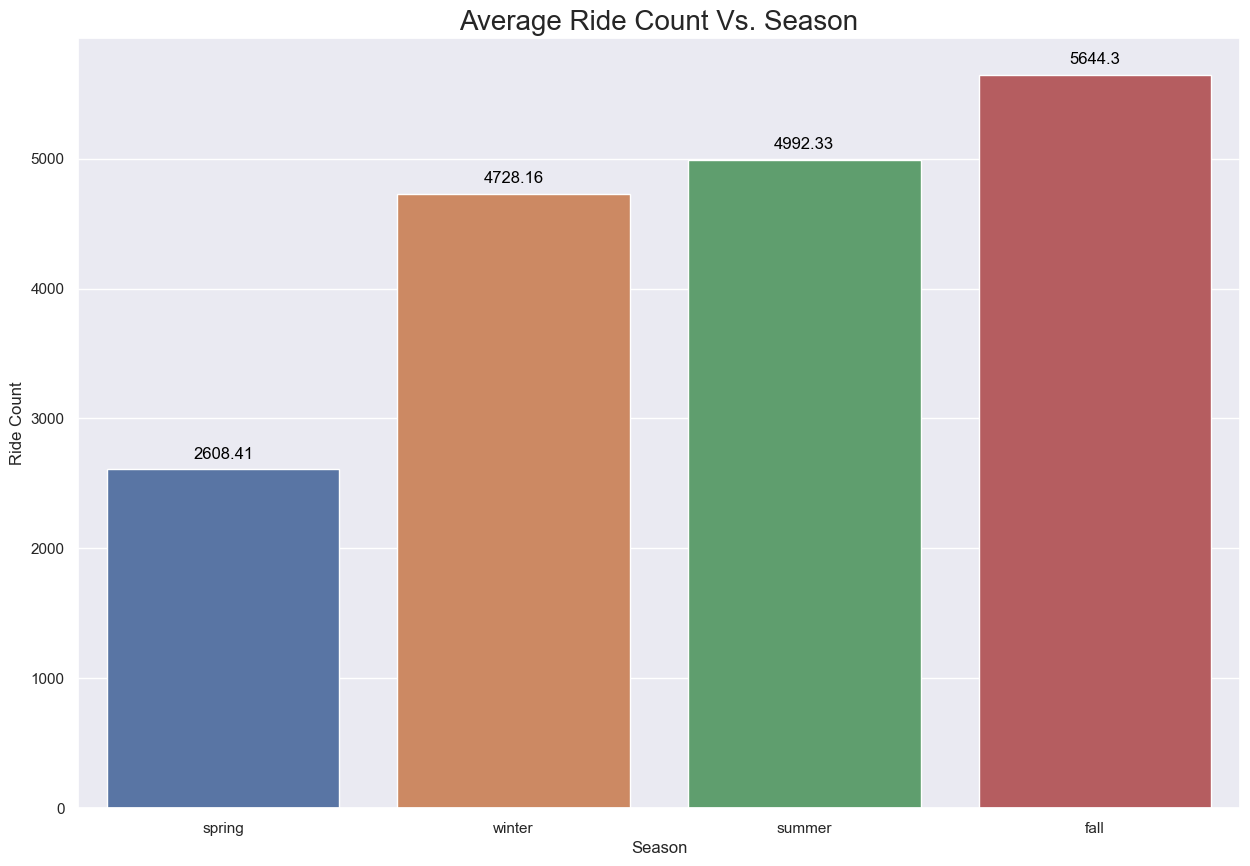

            sum     mean  count  sum in %  count in %
season                                               
fall    1061129  5644.30    188     32.24       25.75
summer   918589  4992.33    184     27.91       25.21
winter   841613  4728.16    178     25.57       24.38
spring   469514  2608.41    180     14.27       24.66


In [17]:
bar_graph_plot_function(data=season_dist, graph_title='Average Ride Count Vs. Season', x_axis_label='Season',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0)

print (stats_cat('season'))

#### We seen that fall season has maximum avg ride count and season might have an importatnt role in being one of the deciding factor.

### Ride count mean accross Months

In [18]:
month_dist = bike.groupby(by='mnth').cnt.mean()

C:\Users\amann\AppData\Local\Temp\ipykernel_21348\240145220.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in enumerate(data.iteritems()):


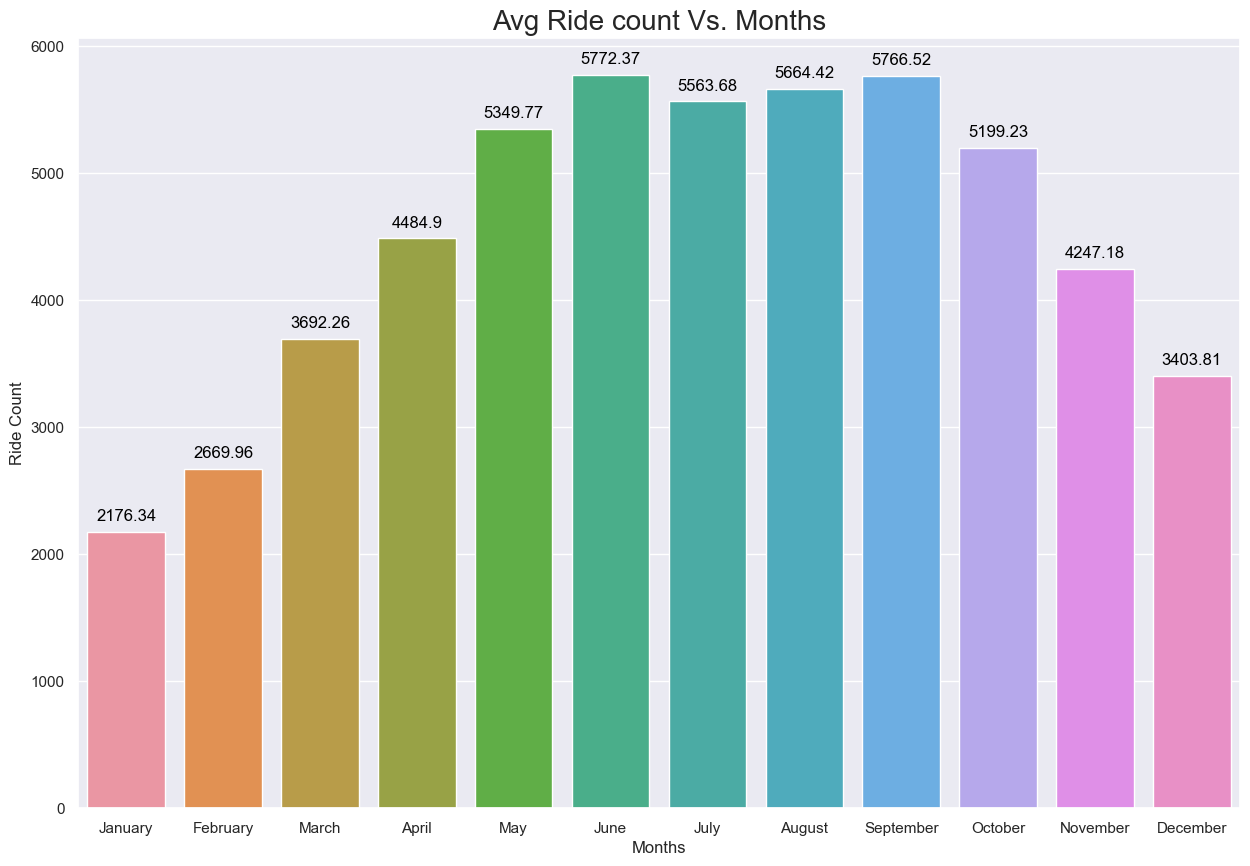

         sum     mean  count  sum in %  count in %
mnth                                              
8     351194  5664.42     62     10.67        8.49
6     346342  5772.37     60     10.52        8.22
9     345991  5766.52     60     10.51        8.22
7     344948  5563.68     62     10.48        8.49
5     331686  5349.77     62     10.08        8.49
10    322352  5199.23     62      9.80        8.49
4     269094  4484.90     60      8.18        8.22
11    254831  4247.18     60      7.74        8.22
3     228920  3692.26     62      6.96        8.49
12    211036  3403.81     62      6.41        8.49
2     149518  2669.96     56      4.54        7.67
1     134933  2176.34     62      4.10        8.49


In [19]:
bar_graph_plot_function(data=month_dist, graph_title = 'Avg Ride count Vs. Months', x_axis_label = 'Months',
                       y_axis_label = 'Ride Count', data_label= 'horizontal', x_label_rotation = 0,
                       x_text=[datetime.date(1900, i , 1).strftime('%B') for i in range(1,13)])

print(stats_cat('mnth'))

#### We see a rise in demand during the months of May to October. 
Month column is also significant for the modeling. 

### Now compairing Ride Count in Years 2018 & 2019

In [20]:
year_dist = bike.groupby(by='yr').cnt.mean()

C:\Users\amann\AppData\Local\Temp\ipykernel_21348\240145220.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in enumerate(data.iteritems()):


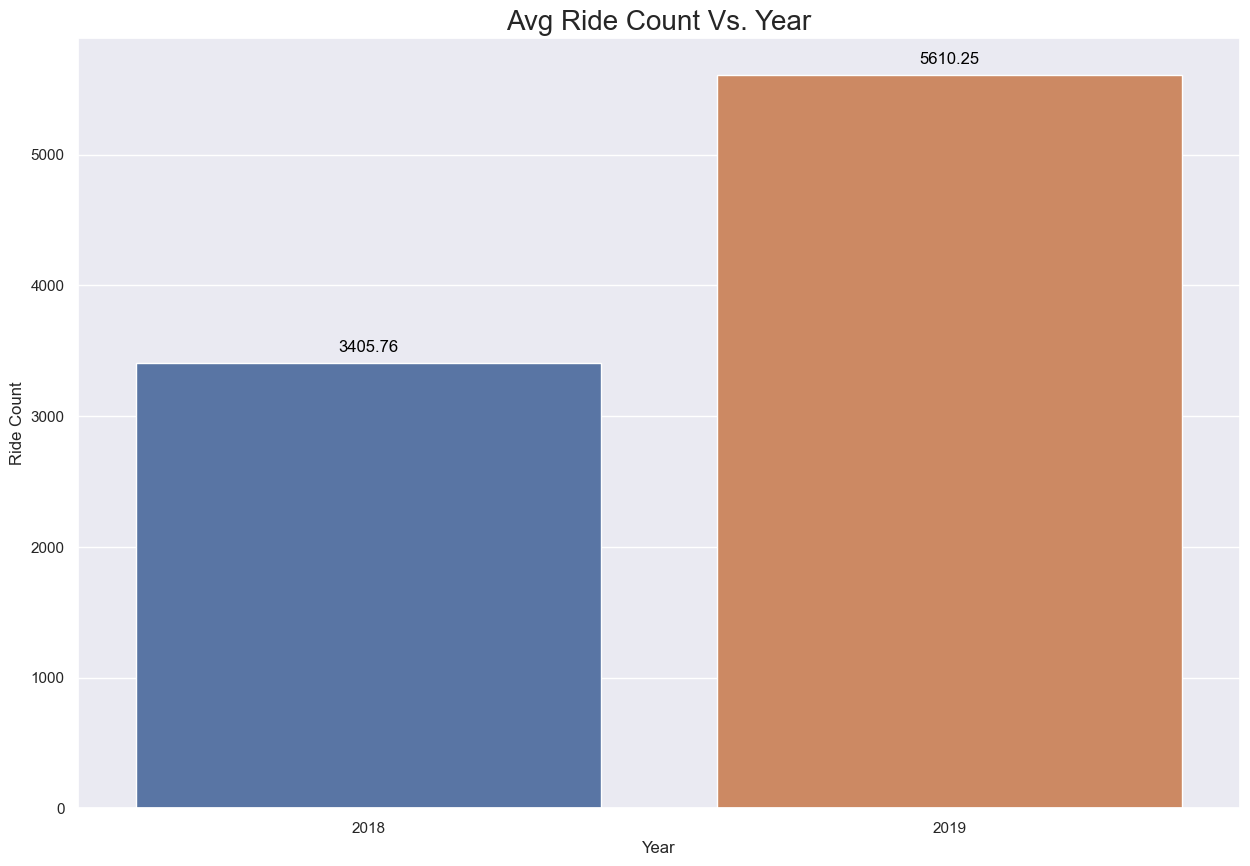

        sum     mean  count  sum in %  count in %
yr                                               
1   2047742  5610.25    365     62.23        50.0
0   1243103  3405.76    365     37.77        50.0


In [21]:
bar_graph_plot_function(data=year_dist, graph_title='Avg Ride Count Vs. Year', x_axis_label = 'Year',
                  y_axis_label = 'Ride Count', data_label = 'horizontal', x_label_rotation = 0,
                  x_text = ['2018' , '2019'])


print (stats_cat('yr'))

#### We see that, Ride count has increases comparatively in 2019 as compared to 2018. This can also be decisive factor for predicting target (output).

### Ride Count Mean accross Holiday/ WorkingDay

In [22]:
holiday_dist = bike.groupby(by='holiday').cnt.mean()

C:\Users\amann\AppData\Local\Temp\ipykernel_21348\240145220.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in enumerate(data.iteritems()):


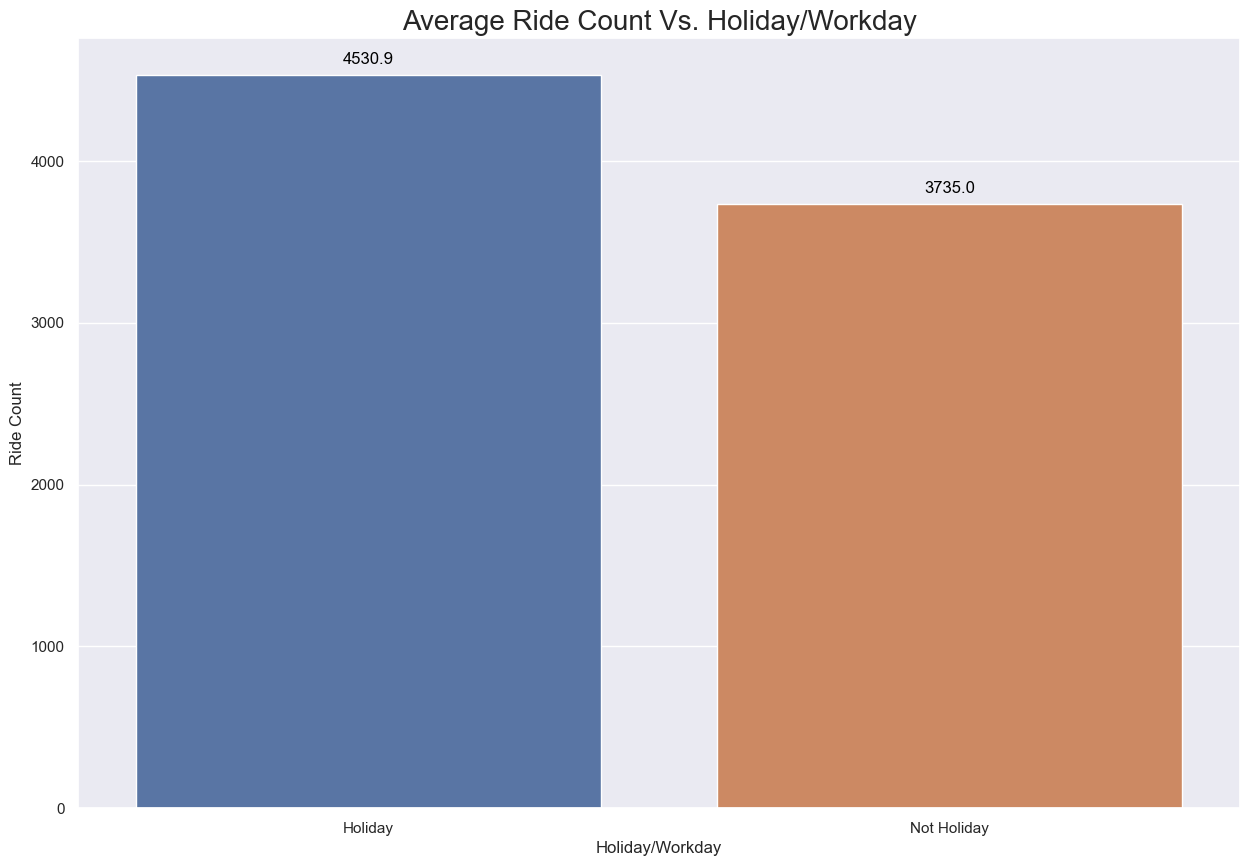

             sum    mean  count  sum in %  count in %
holiday                                              
0        3212410  4530.9    709     97.62       97.12
1          78435  3735.0     21      2.38        2.88


In [23]:
bar_graph_plot_function(data=holiday_dist, graph_title='Average Ride Count Vs. Holiday/Workday', x_axis_label = 'Holiday/Workday',
                       y_axis_label = 'Ride Count', data_label = 'horizontal', x_label_rotation=0,
                       x_text=['Holiday', 'Not Holiday'])

print(stats_cat('holiday'))

### Analysing weathersit column now.

In [24]:
bike['weathersit'].replace({1:'Clear',2:'Misty or Cloudy',3:'Light Precipitation',4:'Heavy Precipitation'}, inplace=True)

In [25]:
bike.groupby('weathersit').count()

,season,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt
weathersit,,,,,,,,,
Clear,463,463,463,463,463,463,463,463,463
Light Precipitation,21,21,21,21,21,21,21,21,21
Misty or Cloudy,246,246,246,246,246,246,246,246,246


In [26]:
weathersit_dist = bike.groupby(by='weathersit').cnt.mean()

C:\Users\amann\AppData\Local\Temp\ipykernel_21348\240145220.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in enumerate(data.iteritems()):


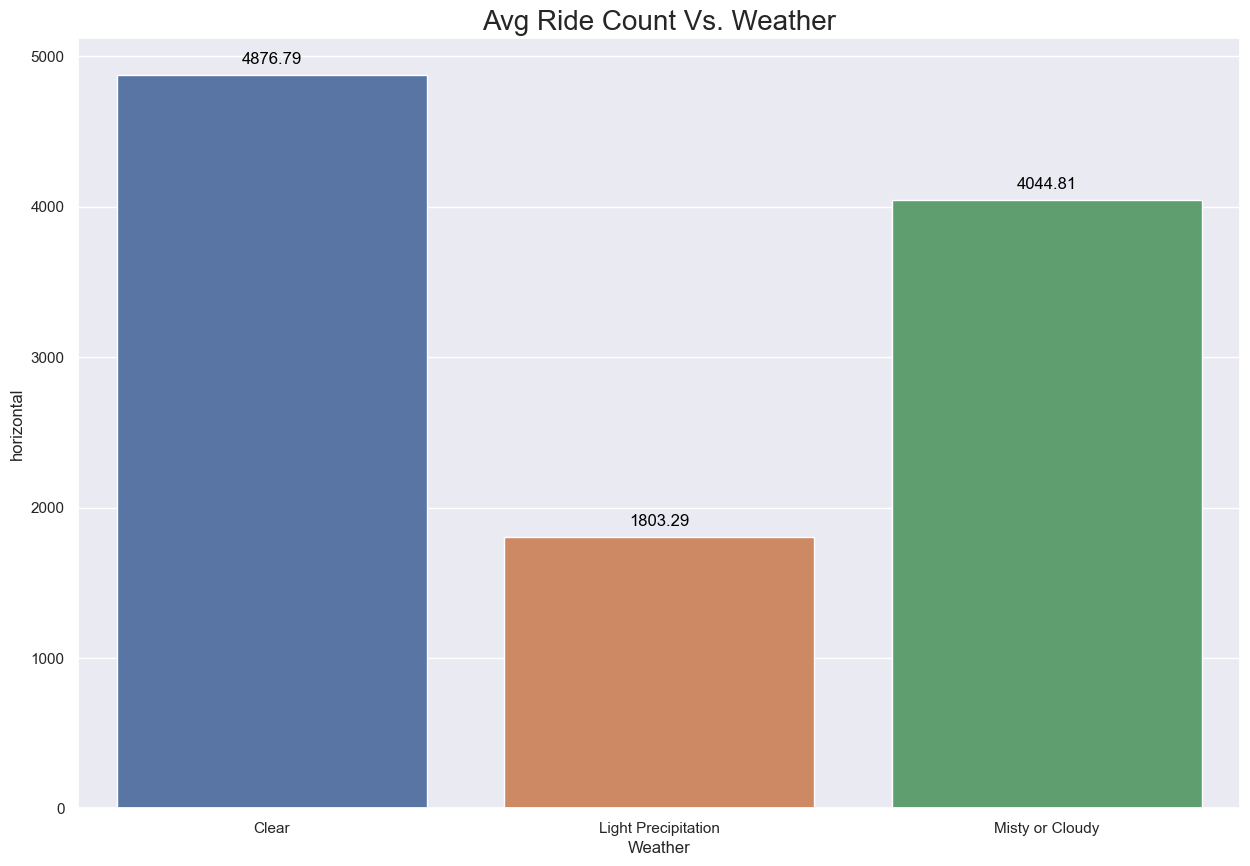

                         sum     mean  count  sum in %  count in %
weathersit                                                        
Clear                2257952  4876.79    463     68.61       63.42
Misty or Cloudy       995024  4044.81    246     30.24       33.70
Light Precipitation    37869  1803.29     21      1.15        2.88


In [27]:
bar_graph_plot_function(data=weathersit_dist, graph_title='Avg Ride Count Vs. Weather', x_axis_label = 'Weather',
                       y_axis_label = 'horizontal', x_label_rotation =0)

print(stats_cat('weathersit'))

#### We can clearly see that the demand for bike rental is much more in clear and misty cloudy weather than the Rainy days. 

### Adding Dummy Variables


In [28]:
dummy_variable_columns = ['mnth', 'season', 'weathersit']

In [29]:
status = pd.get_dummies(bike[dummy_variable_columns], drop_first = True)
status

,mnth,season_spring,season_summer,season_winter,weathersit_Light Precipitation,weathersit_Misty or Cloudy
0,1,1,0,0,0,1
1,1,1,0,0,0,1
2,1,1,0,0,0,0
3,1,1,0,0,0,0
4,1,1,0,0,0,0
...,...,...,...,...,...,...
725,12,1,0,0,0,1
726,12,1,0,0,0,1
727,12,1,0,0,0,1
728,12,1,0,0,0,0


In [30]:
bike = pd.concat([bike, status], axis =1)

In [31]:
bike = bike.drop(columns = dummy_variable_columns)

In [32]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Precipitation,weathersit_Misty or Cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0


## Splitting Data in Test and Train Set.

In [33]:
train , test = train_test_split(bike, train_size = 0.7, random_state=100)

In [34]:
train.shape

(510, 12)

In [35]:
test.shape

(220, 12)

# Data Transformation (Normalising)

In [36]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Precipitation,weathersit_Misty or Cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0


### Following Numerical columns need to be normalised:
 
 - Temprature
 - Humidity
 - Windspeed
 - Count total

In [37]:
numerical_variables = ['temp', 'hum', 'windspeed', 'cnt']

In [38]:
train[numerical_variables]= MinMaxScaler().fit_transform(train[numerical_variables])
train.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Precipitation,weathersit_Misty or Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,0,1
580,1,0,0,0.914852,0.632030,0.462538,0.782559,0,0,0,0,0
500,1,0,1,0.719639,0.719193,0.172431,0.851588,0,1,0,0,0
479,1,0,1,0.520271,0.440962,0.164434,0.710308,0,1,0,0,0
472,1,0,1,0.503656,0.586518,0.270032,0.499885,0,1,0,0,1
455,1,0,1,0.456929,0.696865,0.279394,0.692476,0,1,0,0,1


# Manual analysis of Variables using Correlation Co-efficient

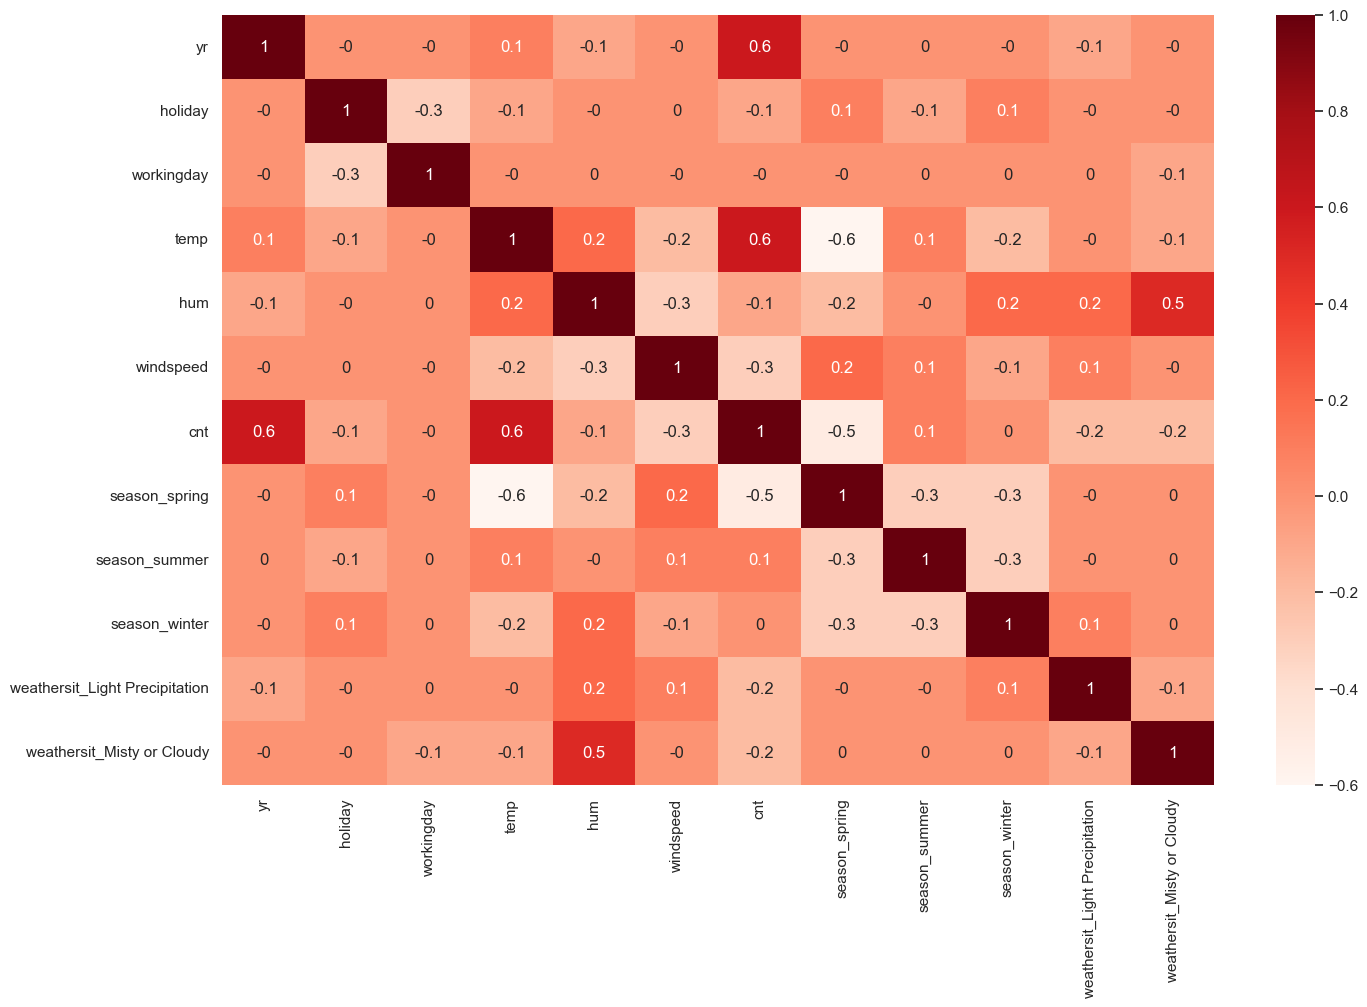

In [39]:
train.corr()
plt.figure(figsize=(16,10))
sns.heatmap(round(train.corr(), 1), annot = True, cmap='Reds')
plt.show()

### No major insight available via heat map so we dwell further into multi collinerarity. 

#### Fixing trained target Variable

In [40]:
y_train = train.pop('cnt')

#### Fixing trained features Variable

In [41]:
X_train = train

# Iterative Modeling Process

### We will use REF (Recursive Feature Elimination) method, which will provide us with set of ranked variables in order of importance. 

In [42]:
#Creating 'Variance Inflation Factor' function.

In [43]:
def fetch_vif_df(local_df):
    vif_df = pd.DataFrame()
    vif_df['features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'],2)
    vif_df = vif_df.sort_values(by='VIF', ascending = False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

# Recursive Feature Elimination (REF) Application

In [44]:
lm = LinearRegression()
lm.fit(X_train , y_train)
rfe = RFE(lm, n_features_to_select = 10)
rfe = rfe.fit(X_train , y_train)

In [45]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns , 'Select Status': rfe.support_ , 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,yr,True,1
1,holiday,True,1
3,temp,True,1
4,hum,True,1
5,windspeed,True,1
6,season_spring,True,1
7,season_summer,True,1
8,season_winter,True,1
9,weathersit_Light Precipitation,True,1
10,weathersit_Misty or Cloudy,True,1


#### RFE method gave us 10 predictors to work with which will impact the outcome. 

### Model Building process - 1

In [46]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.2
Date:                Wed, 26 Jul 2023   Prob (F-statistic):          8.27e-183
Time:                        20:22:08   Log-Likelihood:                 485.99
No. Observations:                 510   AIC:                            -950.0
Df Residuals:                     499   BIC:                            -903.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2932      0.036      8.242      0.000       0.223       0.363
yr                                 0.2307      0.008     27.176      0.000       0.214       0.247
holiday                           -0.0860      0.027     -3.224      0.001      -0.138      -0.034
temp                               0.4960      0.035     14.316      0.000       0.428       0.564
hum                               -0.1406      0.039     -3.590      0.000      -0.218      -0.064
windspeed                         -0.1830      0.027     -6.802      0.000      -0.236      -0.130
season_spring                     -0.0749      0.021     -3.606      0.000      -0.116      -0.034
season_summer                      0.0432      0.014      3.101      0.002       0.016       0.071
season_winter                      0.0871      0.017      5.110      0.000       0.054       0.121
weathersit_Light Precipitation    -0.2396      0.028     -8.701      0.000      -0.294      -0.185
weathersit_Misty or Cloudy        -0.0522      0.011     -4.761      0.000      -0.074      -0.031
==============================================================================
Omnibus:                       63.872   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.401
Skew:                          -0.644   Prob(JB):                     2.43e-35
Kurtosis:                       5.417   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
fetch_vif_df(X_train_rfe)

,features,VIF
0,hum,26.98
1,temp,14.79
2,windspeed,4.64
3,season_spring,3.71
4,season_winter,3.04
5,weathersit_Misty or Cloudy,2.28
6,season_summer,2.24
7,yr,2.07
8,weathersit_Light Precipitation,1.24
9,holiday,1.04


### From the above observation we see that P-Value of all features is under control. From the VIF Table we see that Humidity can be explained by other featues. we will process the model again w/o humidity feature.

## Model - 2

In [48]:
col = col.drop(['hum'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.1
Date:                Wed, 26 Jul 2023   Prob (F-statistic):          2.84e-181
Time:                        20:22:08   Log-Likelihood:                 479.48
No. Observations:                 510   AIC:                            -939.0
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2222      0.030      7.427      0.000       0.163       0.281
yr                                 0.2341      0.009     27.423      0.000       0.217       0.251
holiday                           -0.0872      0.027     -3.231      0.001      -0.140      -0.034
temp                               0.4662      0.034     13.698      0.000       0.399       0.533
windspeed                         -0.1546      0.026     -5.942      0.000      -0.206      -0.103
season_spring                     -0.0827      0.021     -3.959      0.000      -0.124      -0.042
season_summer                      0.0382      0.014      2.726      0.007       0.011       0.066
season_winter                      0.0745      0.017      4.416      0.000       0.041       0.108
weathersit_Light Precipitation    -0.2785      0.026    -10.873      0.000      -0.329      -0.228
weathersit_Misty or Cloudy        -0.0750      0.009     -8.291      0.000      -0.093      -0.057
==============================================================================
Omnibus:                       62.352   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.141
Skew:                          -0.634   Prob(JB):                     5.57e-34
Kurtosis:                       5.366   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
fetch_vif_df(X_train_rfe)

,features,VIF
0,windspeed,4.60
1,temp,3.56
2,yr,2.07
3,season_spring,1.95
4,season_summer,1.80
5,season_winter,1.61
6,weathersit_Misty or Cloudy,1.53
7,weathersit_Light Precipitation,1.08
8,holiday,1.04


### We see from the summary report that all P-Values of the features are under 0.05. and VIF value are under 5.

# Assumptions

### assumptions of normal distributed Error Terms

- After building model we need to check if distribution of Errors is arround Zero or not.

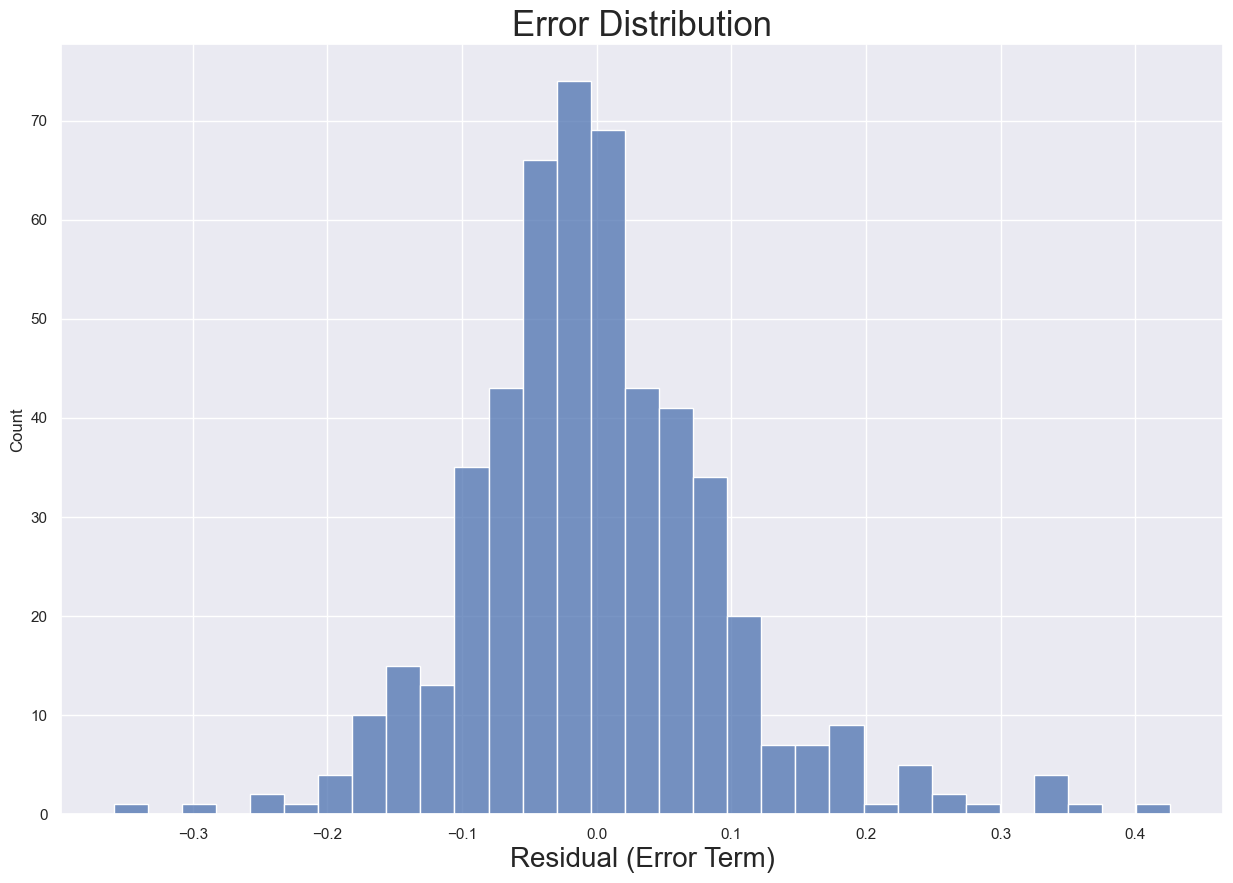

In [50]:
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train_pred - y_train
sns.histplot(residual)
plt.xlabel('Residual (Error Term)' , fontdict = {'fontsize':20})
plt.title('Error Distribution' , fontdict = {'fontsize' : 25})
plt.show()

#### From the above histogram we can clearly see that error distribution is cerntered near 0 and error are normaly distributed.

### Checking Assumption of Error Terms Being Independent 

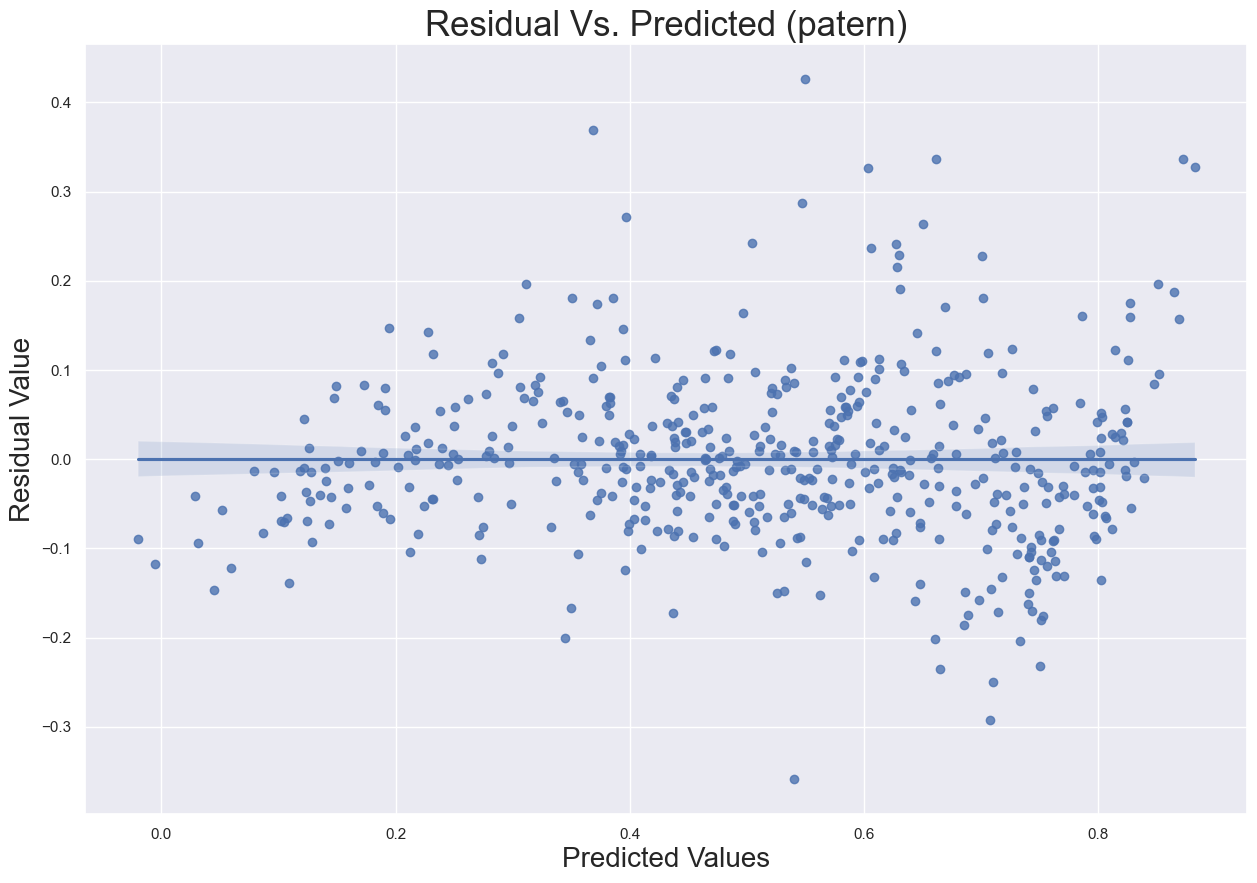

In [51]:
sns.regplot(x=y_train_pred , y=residual)
plt.title('Residual Vs. Predicted (patern)', fontdict = {'fontsize': 25})
plt.xlabel('Predicted Values', fontdict = {'fontsize': 20})
plt.ylabel('Residual Value', fontdict = {'fontsize': 20})
plt.show()

#### From the above chart we can see that there is no relation b/w residual and predicted value. So we can say that the error are independent. 

## Homoscedasticity

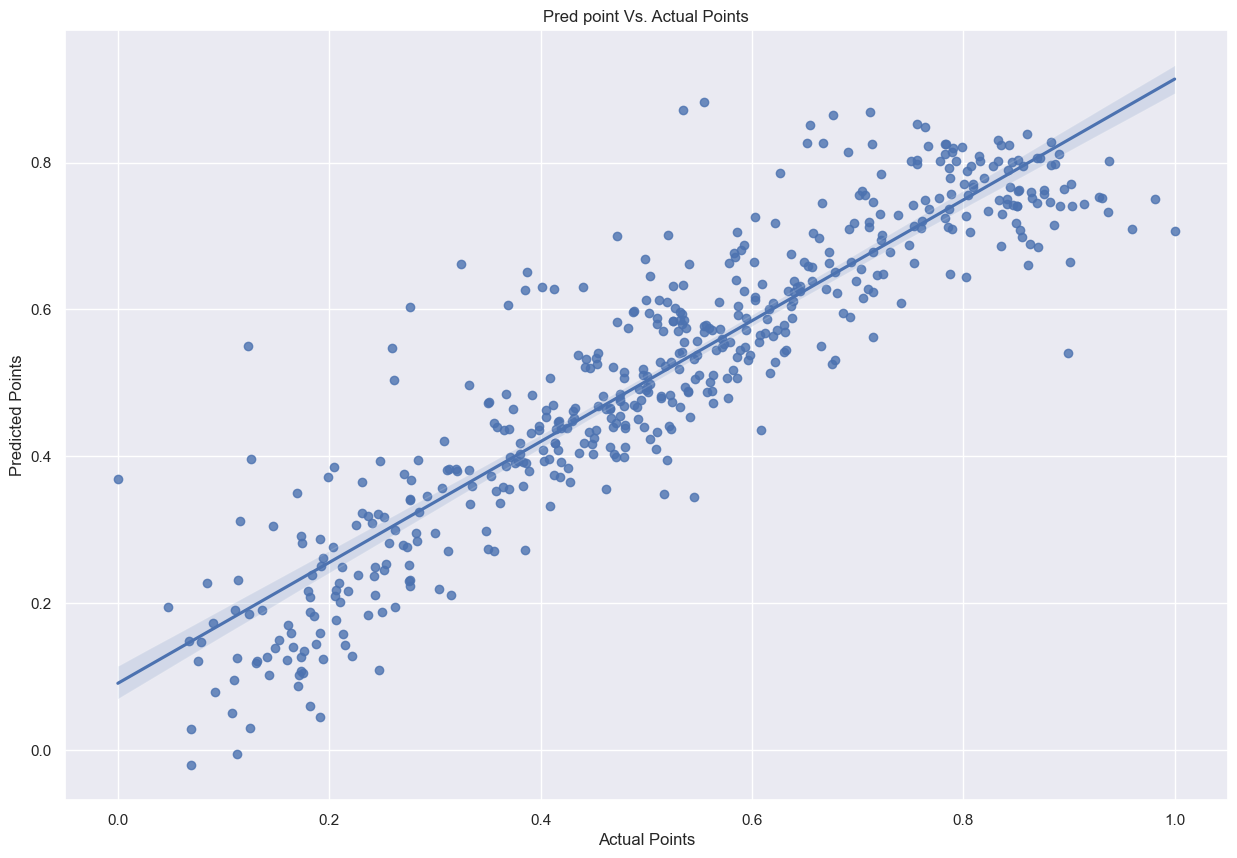

In [52]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Pred point Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

#### From the above graph we can see that the points are equally distributed. The variance is thru out the and no concentration in any certain region. 

### This proves that the Error are Homescedastic

# Multicorelation check

### Multicorealtion we have allready checked while making the model by checking VIF of every predictor factor. where VIF for every predictor factor was less than 5.0.


In [53]:
fetch_vif_df(X_train_rfe)

,features,VIF
0,windspeed,4.60
1,temp,3.56
2,yr,2.07
3,season_spring,1.95
4,season_summer,1.80
5,season_winter,1.61
6,weathersit_Misty or Cloudy,1.53
7,weathersit_Light Precipitation,1.08
8,holiday,1.04


### Evaluating Corelation Co-efficient of Predictors impacting Target Variable (Individually).

In [54]:
corr_dict = {index: round(pearsonr(y_train, X_train_rfe[index])[0],2) for index in X_train_rfe.columns}
corr_df = pd.DataFrame(corr_dict.values(), index=corr_dict.keys(), columns = ['Correlation_Coefficient'])
corr_df.iloc[(-corr_df['Correlation_Coefficient'].abs()).argsort()]

,Correlation_Coefficient
temp,0.65
yr,0.59
season_spring,-0.55
windspeed,-0.25
weathersit_Light Precipitation,-0.23
weathersit_Misty or Cloudy,-0.17
season_summer,0.14
holiday,-0.10
season_winter,0.03


In [55]:
test[numerical_variables] = MinMaxScaler().fit_transform(test[numerical_variables])
test.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Precipitation,weathersit_Misty or Cloudy
184,0,1,0,0.837241,0.534223,0.149393,0.704300,0,0,0,0,1
535,1,0,1,0.911423,0.470417,0.231142,0.725421,0,1,0,0,0
299,0,0,0,0.496221,0.777843,0.443398,0.278853,0,0,1,0,1
221,0,0,1,0.890387,0.236659,0.449707,0.545512,0,0,0,0,0
152,0,0,0,0.821739,0.070765,0.682387,0.569148,0,1,0,0,0


## Fixing Test Target Variable

In [56]:
y_test = test.pop('cnt')

## Fixing test Features/ Variables

In [57]:
X_test = test

### Filtering Test Featrures and reserving required Features only

In [58]:
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

## Predicting Test Data Using Developed Model

In [59]:
y_test_pred = lr_model.predict(X_test_new)

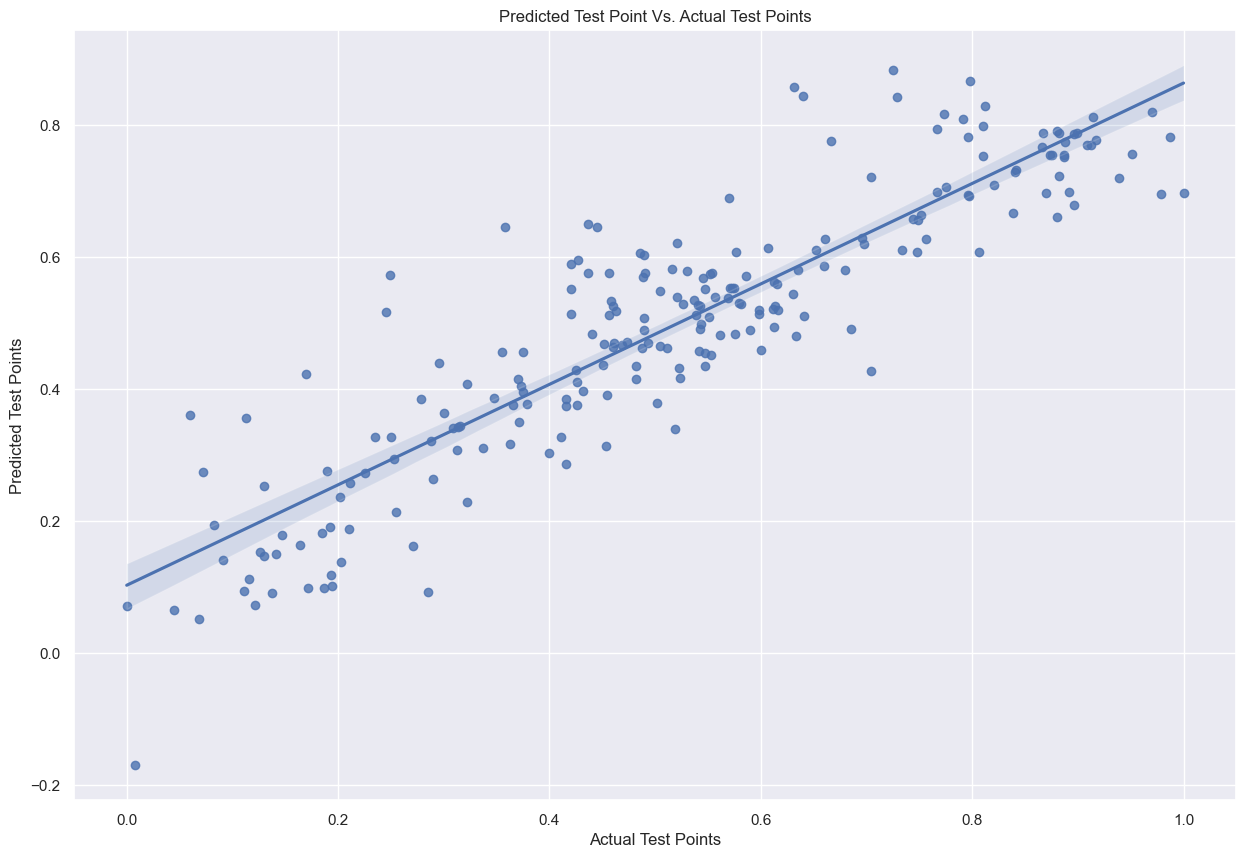

In [60]:
corr_plot = sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Test Point Vs. Actual Test Points')
plt.xlabel('Actual Test Points')
plt.ylabel('Predicted Test Points')
plt.show()

### Above graph clearly shows linear relationship b/w Actual Test Data Points and Predicted Test Data Points.

# Generating R-Square

In [61]:
r2_score(y_test, y_test_pred) 

0.7882638927189716